In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from tqdm import tqdm
from collections import Counter

from transformers import pipeline

from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu

In [3]:
def process_batch(batchn):
    og = list(pd.read_csv(f"../data/hatexplain_perspective/persp_score_original_{batchn}.csv")["score"])
    aave = list(pd.read_csv(f"../data/hatexplain_perspective/persp_score_aave_{batchn}.csv")["score"])
    nigerianD = list(pd.read_csv(f"../data/hatexplain_perspective/persp_score_nigerianD_{batchn}.csv")["score"])
    indianD = list(pd.read_csv(f"../data/hatexplain_perspective/persp_score_indianD_{batchn}.csv")["score"])
    singlish = list(pd.read_csv(f"../data/hatexplain_perspective/persp_score_singlish_{batchn}.csv")["score"])

    og_errors = json.load(open(f"../data/hatexplain_perspective/errors_original_{batchn}.json"))
    aave_errors = json.load(open(f"../data/hatexplain_perspective/errors_aave_{batchn}.json"))
    nigerianD_errors = json.load(open(f"../data/hatexplain_perspective/errors_nigerianD_{batchn}.json"))
    indianD_errors = json.load(open(f"../data/hatexplain_perspective/errors_indianD_{batchn}.json"))
    singlish_errors = json.load(open(f"../data/hatexplain_perspective/errors_singlish_{batchn}.json"))
            
    for idx in og_errors:
        og.insert(idx, 0)    
    for idx in aave_errors:
        aave.insert(idx, 0)
    for idx in nigerianD_errors:
        nigerianD.insert(idx, 0)
    for idx in indianD_errors:
        indianD.insert(idx, 0)
    for idx in singlish_errors:
        singlish.insert(idx, 0)
    
    to_drop = sorted(list(set(og_errors + aave_errors + nigerianD_errors + indianD_errors + singlish_errors)), reverse=True)

    for idx in to_drop:
        del og[idx]
        del aave[idx]
        del nigerianD[idx]
        del indianD[idx]
        del singlish[idx]

    return og, aave, nigerianD, indianD, singlish

In [4]:
og1, aave1, nigerianD1, indianD1, singlish1 = process_batch("batch1")
og2, aave2, nigerianD2, indianD2, singlish2 = process_batch("batch2")
og3, aave3, nigerianD3, indianD3, singlish3 = process_batch("batch3")
og4, aave4, nigerianD4, indianD4, singlish4 = process_batch("batch4")

In [5]:
og = og1 + og2 + og3 + og4
aave = aave1 + aave2 + aave3 + aave4
nigerianD = nigerianD1 + nigerianD2 + nigerianD3 + nigerianD4
indianD = indianD1 + indianD2 + indianD3 + indianD4
singlish = singlish1 + singlish2 + singlish3 + singlish4

In [6]:
print(np.average(og))
print(np.average(aave))
print(np.average(nigerianD))
print(np.average(indianD))
print(np.average(singlish))

0.5808776316828453
0.5716400205195041
0.5799578625433732
0.5682907347316806
0.5796024218792838


In [8]:
def check_increase_decrease(og, dialect):
    increase = []
    decrease = []

    for i in range(len(og)):
        if dialect[i] > og[i]:
            increase.append(i)
        elif dialect[i] < og[i]:
            decrease.append(i)

    print("dialect more toxic", len(increase))
    print("original more toxic", len(decrease))

In [9]:
check_increase_decrease(og, aave)

dialect more toxic 6560
original more toxic 11172


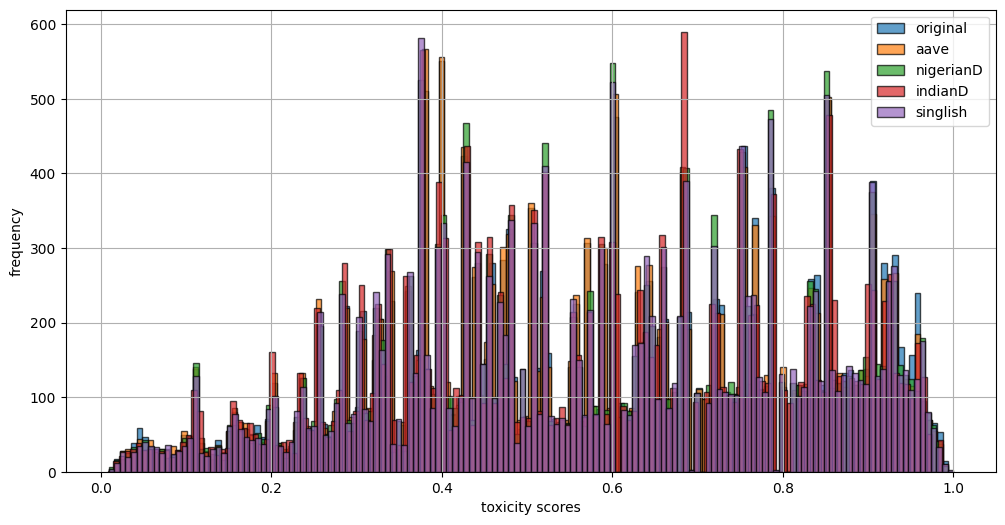

In [11]:
plt.figure(figsize=(12, 6))

plt.hist(og, bins=150, edgecolor="black", alpha=0.7, label="original")
plt.hist(aave, bins=150, edgecolor="black", alpha=0.7, label="aave")
plt.hist(nigerianD, bins=150, edgecolor="black", alpha=0.7, label="nigerianD")
plt.hist(indianD, bins=150, edgecolor="black", alpha=0.7, label="indianD")
plt.hist(singlish, bins=150, edgecolor="black", alpha=0.7, label="singlish")

plt.xlabel("toxicity scores")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# KS test for prediction confidence on Davidson
print("overall: KS test for prediction confidence original vs. dialects")
stat, p = ks_2samp(og, aave)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp(og, nigerianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp(og, indianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp(og, singlish)
print('Statistics=%e, p=%e' % (stat, p))

overall: KS test for prediction confidence original vs. dialects
Statistics=2.214795e-02, p=1.055152e-04
Statistics=7.881479e-03, p=5.592610e-01
Statistics=2.419315e-02, p=1.575249e-05
Statistics=8.978900e-03, p=3.918651e-01


In [16]:
# cross-dialect confidence differences (aave against other 3)
stat, p = ks_2samp(aave, nigerianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp(aave, indianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = ks_2samp(aave, singlish)
print('Statistics=%e, p=%e' % (stat, p))

Statistics=1.696014e-02, p=6.188034e-03
Statistics=1.127351e-02, p=1.552386e-01
Statistics=1.656108e-02, p=8.093768e-03


In [14]:
# Mann Whitney U test for prediction confidence on Davidson
print("overall: Mann Whitney U test for prediction confidence original vs. dialects")
stat, p = mannwhitneyu(og, aave)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu(og, nigerianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu(og, indianD)
print('Statistics=%e, p=%e' % (stat, p))
stat, p = mannwhitneyu(og, singlish)
print('Statistics=%e, p=%e' % (stat, p))

overall: Mann Whitney U test for prediction confidence original vs. dialects
Statistics=2.056654e+08, p=4.562727e-05
Statistics=2.016479e+08, p=5.419126e-01
Statistics=2.075338e+08, p=1.274772e-08
Statistics=2.018931e+08, p=4.113341e-01


In [9]:
aave_batch1 = pd.read_csv("../data/hatexplain_perspective/persp_score_aave_batch1.csv")
aave_batch2 = pd.read_csv("../data/hatexplain_perspective/persp_score_aave_batch2.csv")
aave_batch3 = pd.read_csv("../data/hatexplain_perspective/persp_score_aave_batch3.csv")
aave_batch4 = pd.read_csv("../data/hatexplain_perspective/persp_score_aave_batch4.csv")

# concatenate all batches
aave = pd.concat([aave_batch1, aave_batch2, aave_batch3, aave_batch4], ignore_index=True)

In [12]:
print(np.average(og))
print(np.average(aave["score"]))

0.5808776316828453
0.5714027280275524


In [14]:
stat, p = ks_2samp([abs(c) for c in og], [abs(c) for c in aave["score"]])
print('Statistics=%e, p=%e' % (stat, p))

stat, p = mannwhitneyu([abs(c) for c in og], [abs(c) for c in aave["score"]])
print('Statistics=%e, p=%e' % (stat, p))

Statistics=2.250697e-02, p=7.571748e-05
Statistics=2.062077e+08, p=2.977744e-05
